### People's Friendship University in Russia

#### Faculty of Science 
#### Department of Mathematical Modeling and Artificial Intelligence 

## Labratory work №3 report


### Meathods of machine learning

##### Student:  Abu Suveilim Mukhammed M.
##### Group:   NKNbd-01-21

## Moscow 2024
### Version №4

Test 3 – Option 4

1. Function of one variable f(x)= (x-3)*sqrt(x) on the interval [1, 3]
2. Order of derivative of a function of one variable 4
3. Function of two variables f(x,y) = xe^-xy in the area [0, 5] × [0, 5]
4. Order of the mixed derivative of a function of two variables
5. Regression quality indicator: maximum error (MaxErr)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.16.1'

## 1. Construct a rank 1 tensor (vector) with the values of the function of one variable specified in the individual task on the segment specified in the individual task and determine the maximum and minimum values of the function.

$f(x) = (x-3)\sqrt{x}$ on interval $[1, 3]$

In [2]:
# define fucntion
def function(x):
    return tf.math.multiply((x - 3),tf.math.sqrt(x))

# input vector for x values
x_values = tf.Variable(np.linspace(1, 3, 100))

# tensor
y_values = function(x_values)

# get max and min fucntion values
max_value = tf.reduce_max(y_values)
min_value = tf.reduce_min(y_values)
print("Maximum value of the function:", max_value.numpy())
print("Minimum value of the function:", min_value.numpy())

Maximum value of the function: 0.0
Minimum value of the function: -2.0


## 2. Plot a graph of the function with lines corresponding to the maximum and minimum values, labeling the axes and figure and creating a legend.


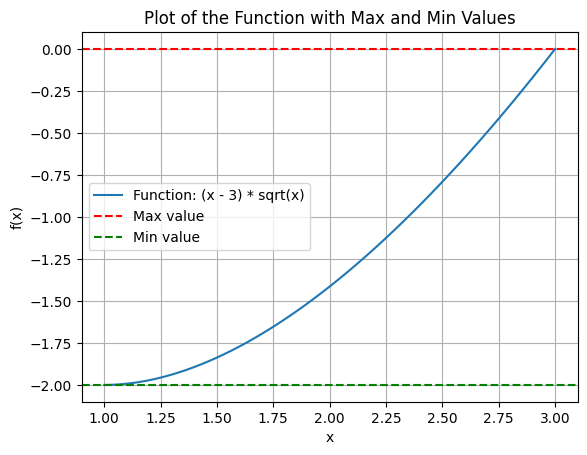

In [3]:
# Plot the function
plt.plot(x_values, y_values, label='Function: (x - 3) * sqrt(x)')

# Plotting lines for maximum and minimum values
plt.axhline(y=max_value, color='r', linestyle='--', label='Max value')
plt.axhline(y=min_value, color='g', linestyle='--', label='Min value')

# labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the Function with Max and Min Values')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## 3. Find the values of the derivative of the function of the order (4th order) specified in the individual task, and plot the resulting function, labeling the axes and the figure.

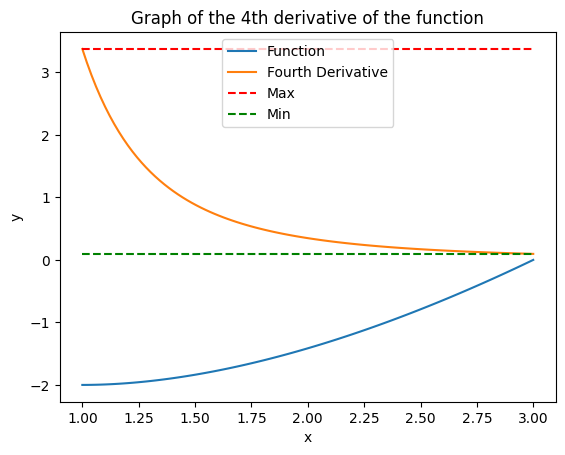

Maximum value of the dervative: 3.375
Minimum value of the function: 0.09622504486493767


In [4]:
# Define the fourth derivative function
def dervfunction(x):
    with tf.GradientTape() as s1:
        with tf.GradientTape() as s2:
            with tf.GradientTape() as s3:
                with tf.GradientTape() as s4:
                    y = function(x)
                    dy_dx = s4.gradient(y, x)
                    d2y_dx2 = s3.gradient(dy_dx, x)
                    d3y_dx3 = s2.gradient(d2y_dx2, x)
                    d4y_dx4 = s1.gradient(d3y_dx3, x)
    return d4y_dx4

# Calculate the fourth derivative
y_4 = dervfunction(x_values)

# Calculate the maximum and minimum values of the fourth derivative
max_value = tf.reduce_max(y_4)
min_value = tf.reduce_min(y_4)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_values, y_values, label="Function")
ax.plot(x_values, y_4.numpy(), label="Fourth Derivative")
ax.plot([1, 3], [max_value, max_value], 'r--', label='Max')
ax.plot([1, 3], [min_value, min_value], 'g--', label='Min')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Graph of the 4th derivative of the function")
ax.legend()
plt.show()
print("Maximum value of the dervative:", max_value.numpy())
print("Minimum value of the function:", min_value.numpy())

## 4. Construct a rank 2 tensor (matrix) with the values of the function of two variables specified in the individual task on the rectangle specified in the individual task and determine the maximum and minimum values of the function.

$f(x, y) = xe^{-xy} $  in area $[0, 5] × [0, 5] $

In [5]:
# define fucntion
def function(x, y):
    return tf.math.multiply(x, tf.math.exp(tf.math.multiply(-x, y)))

# input vector for x and y values
x_values_two = tf.Variable(np.linspace(1, 3, 100))
y_values_two = tf.Variable(np.linspace(1, 3, 100))

# Create meshgrid for x and y values
X, Y = np.meshgrid(x_values_two, y_values_two)


# Compute the function values for each (x, y) pair
Z_tensor = function(X, Y)

# Find the maximum and minimum values of the function
max_value = tf.reduce_max(Z_tensor)
min_value = tf.reduce_min(Z_tensor)

print("Maximum value of the function:", max_value.numpy())
print("Minimum value of the function:", min_value.numpy())

Maximum value of the function: 0.3678794411714423
Minimum value of the function: 0.0003702294122600387


## 5. Plot a 3d surface graph of a function of two variables, labeling the axes and drawing.

$f(x, y) = xe^{-xy} $

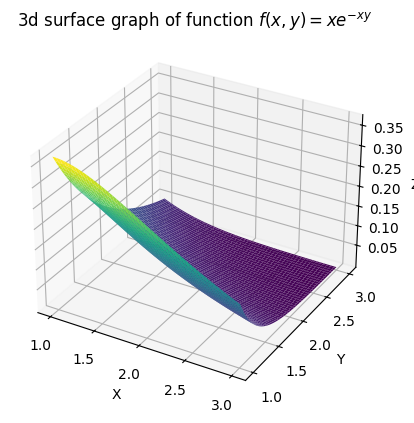

In [17]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_tensor, cmap='viridis')

# Labeling axes and the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3d surface graph of function $f(x, y) = xe^{-xy} $')

plt.show()

## 6.Find the values of the mixed derivative of a function of the order specified in the individual task, and construct a 3d graph of the surface of the resulting function, labeling the axes and drawing.


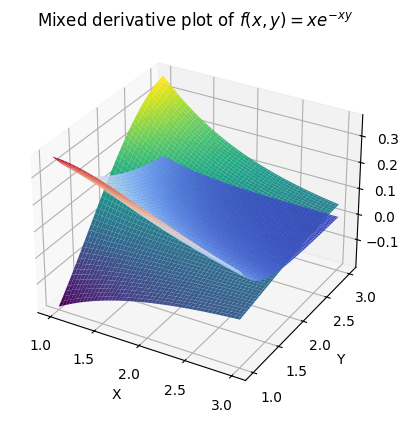

In [18]:
def functionMixed(x, y):
    with tf.GradientTape() as t4:
        t4.watch(y)
        with tf.GradientTape() as t3:
            t3.watch(x)
            with tf.GradientTape() as t2:
                t2.watch(x)
                with tf.GradientTape() as t1:
                    t1.watch(x)
                    t = tf.exp(-x) * tf.math.sin(y)
                g = t1.gradient(t, x)
            h = t2.gradient(g, x)
        k = t3.gradient(h, x)
    l = t4.gradient(k, y)
    return l
# Convert X and Y to TensorFlow tensors
X_tensor = tf.constant(X, dtype=tf.float32)
Y_tensor = tf.constant(Y, dtype=tf.float32)

# Compute the mixed partial derivative
Z_mixed = functionMixed(X_tensor, Y_tensor)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_tensor.numpy(), cmap='coolwarm')
ax.plot_surface(X, Y, Z_mixed.numpy(), cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Mixed derivative plot of $f(x, y) = xe^{-xy} $')
plt.show()

## 7. Solve a paired linear regression problem using the TensorFlow model, treating the rank 1 tensor from item 1 of the task as the value of the dependent variable (response), and the intercept points from the individual task as the value of the independent variable (predictor). Prescale the independent and dependent variables by the interval [0, 1]. Evaluate the quality of the resulting model using the regression quality indicator specified in the individual task. Choose the number of epochs, the learning rate and the initial values of the weights yourself, ensuring the convergence of training. Regression quality indicator: maximum error (MaxErr)

In [19]:
#Let's create create a traing dataset from function in the first excersice
x_train = tf.constant(np.linspace(0, 2, 100), dtype=tf.float32)
y_train = tf.constant(tf.math.multiply((x_train - 3),tf.math.sqrt(x_train)), dtype=tf.float32)

In [20]:
# Define the range for scaling
x_min = tf.reduce_min(x_train)
x_max = tf.reduce_max(x_train)
y_min = tf.reduce_min(y_train)
y_max = tf.reduce_max(y_train)

# Perform Min-Max scaling
xs = (x_train - x_min) / (x_max - x_min)
ys = (y_train - y_min) / (y_max - y_min)


In [21]:
print(tf.math.reduce_max(xs).numpy(), "\n", tf.math.reduce_min(xs).numpy(), "\n", 
      tf.math.reduce_max(ys).numpy(), "\n", tf.math.reduce_min(ys).numpy())


1.0 
 0.0 
 1.0 
 0.0


In [22]:
def loss(predicted_y, target_y):
  return tf.reduce_max(tf.abs(target_y - predicted_y))

In [23]:
class Model(object):
  def __init__(self):
    # Инициализируем вес как `2.0` и смещение как  `1.0`
    # На практике инициализация должна быть случайными значениями (`tf.random.normal`)
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

In [24]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

In [25]:
model = Model()

# Запоминаем историю значений 'w' и 'b' для визуализации
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Эпоха %2d: w=%1.2f b=%1.2f, потери=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Эпоха  0: w=2.00 b=1.00, потери=2.70713
Эпоха  1: w=1.90 b=0.90, потери=2.50713
Эпоха  2: w=1.80 b=0.80, потери=2.30713
Эпоха  3: w=1.70 b=0.70, потери=2.10713
Эпоха  4: w=1.60 b=0.60, потери=1.90713
Эпоха  5: w=1.50 b=0.50, потери=1.70713
Эпоха  6: w=1.40 b=0.40, потери=1.50713
Эпоха  7: w=1.30 b=0.30, потери=1.30713
Эпоха  8: w=1.20 b=0.20, потери=1.10713
Эпоха  9: w=1.10 b=0.10, потери=0.90713
Эпоха 10: w=1.00 b=-0.00, потери=1.00000
Эпоха 11: w=1.00 b=0.10, потери=0.90000
Эпоха 12: w=1.00 b=0.20, потери=0.90827
Эпоха 13: w=0.90 b=0.10, потери=0.90000
Эпоха 14: w=0.90 b=0.20, потери=0.81867


## 8. Plot a learning curve for the regression quality indicator specified in the individual task, depending on the number of epochs. Implement the regression quality indicator as a function using the functions of the tf.math module.


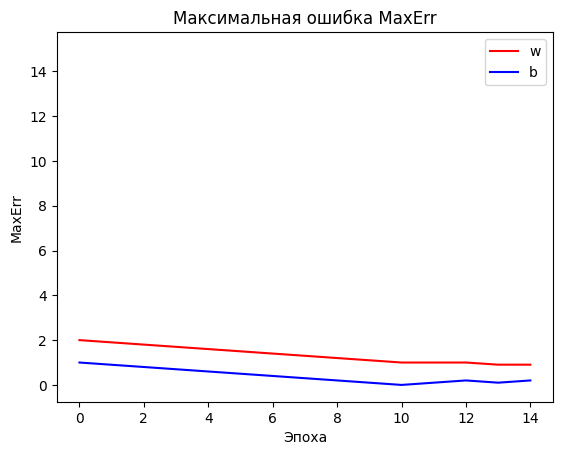

In [26]:
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot(len(epochs), 'r--', len(epochs), 'b--')
plt.legend(['w', 'b'])
plt.title('Максимальная ошибка MaxErr')
plt.xlabel('Эпоха')
plt.ylabel('MaxErr')
plt.show()

## 9. Plot the points of the data set (independent and dependent variables) and the constructed pairwise regression line, labeling the axes and figure and creating a legend.

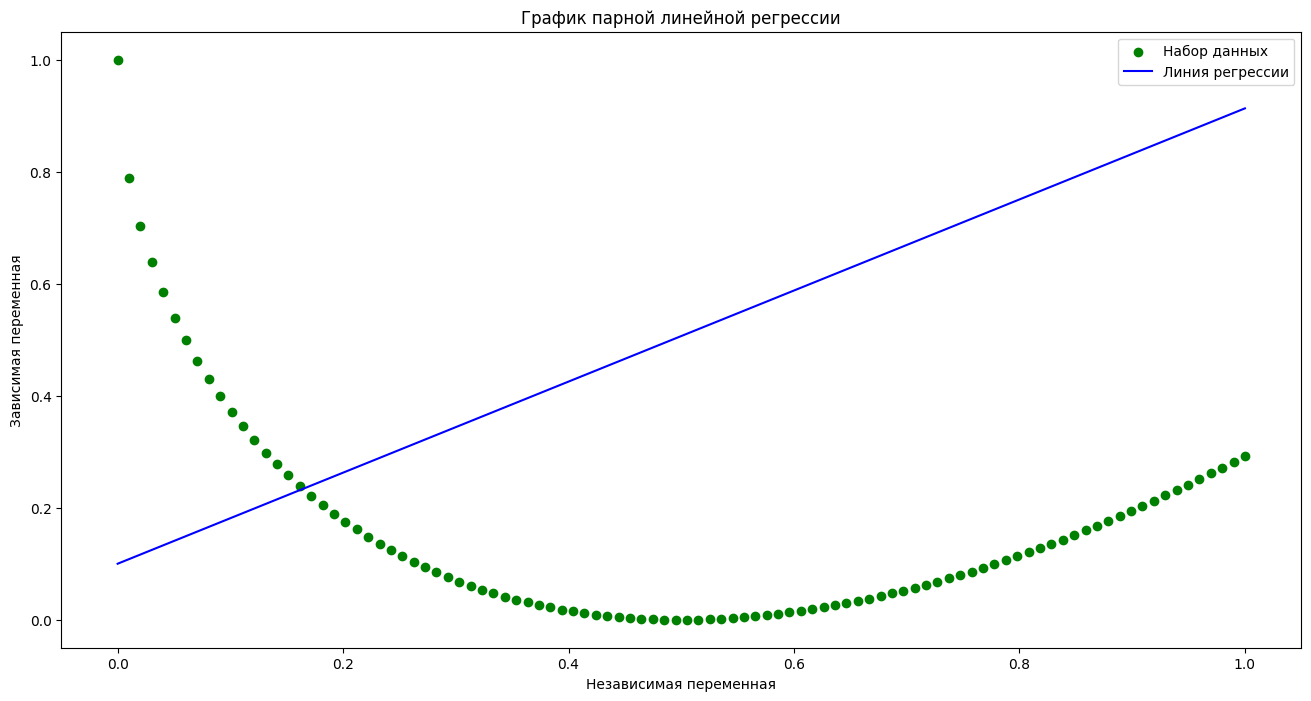

In [27]:
y_pred = model(xs)
plt.figure(figsize=(16, 8))
plt.scatter(xs, ys, label='Набор данных', color='g')
plt.plot(xs, y_pred, label='Линия регрессии', color='b')
plt.xlabel('Независимая переменная')
plt.ylabel('Зависимая переменная')
plt.title('График парной линейной регрессии')
plt.legend()
plt.show()